# Bike Sharing Reservation Prediction



In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

path = '/home/pier/Desktop/Python/MachineLearning' \
       '/Bike Sharing/Bike-Sharing-Dataset/hour.csv'
df = pd.read_csv(path)
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Text(0.5, 1.0, 'Reserved Bicycle vs Hours')

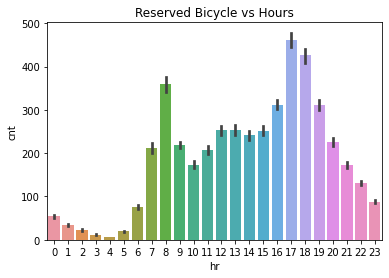

In [3]:
### Reserved Bicycle vs Hours

sns.barplot(data = df,
            x = 'hr',
            y = 'cnt')
plt.title('Reserved Bicycle vs Hours')

## __Exploratory Graph Analysis__

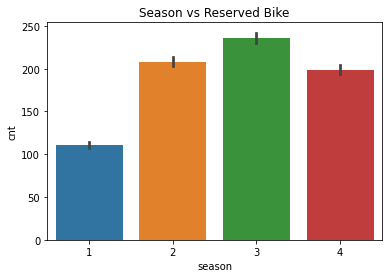

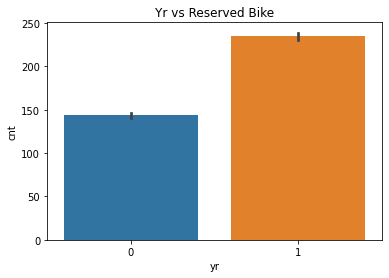

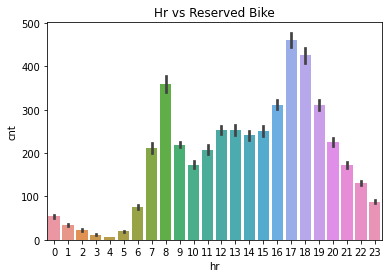

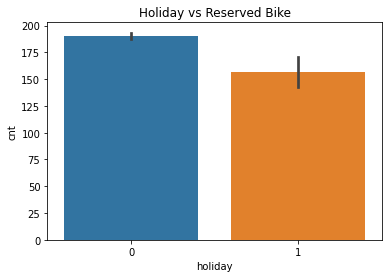

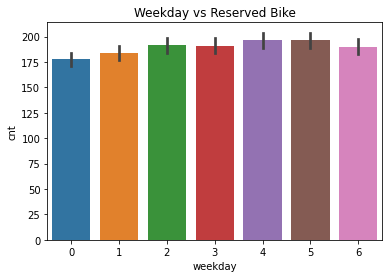

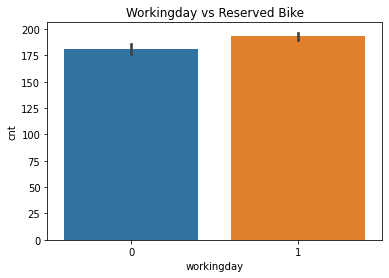

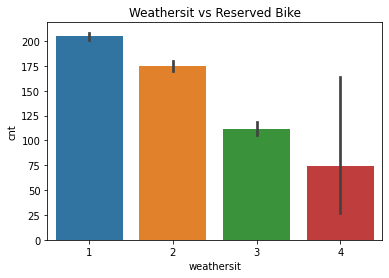

In [7]:
for c in ['season', 'yr', 'hr', 'holiday', 'weekday',
          'workingday','weathersit']:
    sns.barplot(data = df,
                x = c,
                y = 'cnt')
    plt.title(f'{c.capitalize()} vs Reserved Bike')
    plt.show()

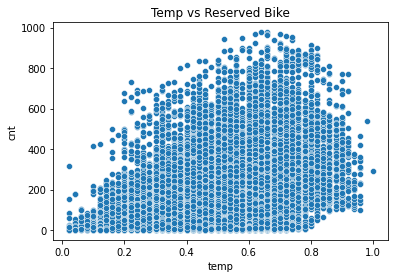

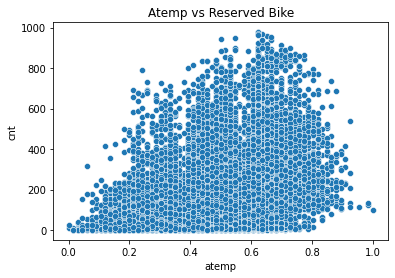

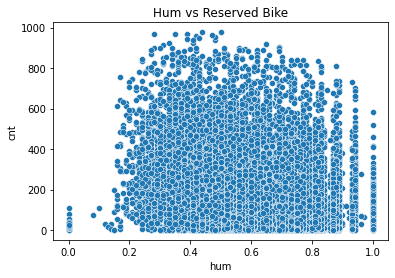

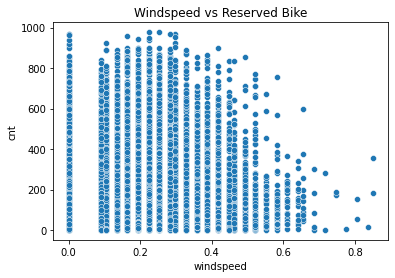

In [6]:
for c in ['temp','atemp','hum','windspeed']:
    sns.scatterplot(data = df,
                    x = c,
                    y = 'cnt')
    plt.title(f'{c.capitalize()} vs Reserved Bike')
    plt.show()

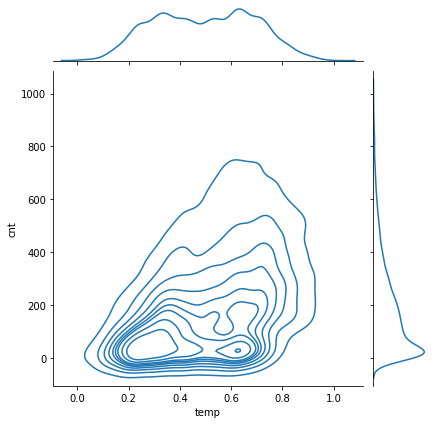

In [8]:
sns.jointplot(data = df,
              x = 'temp',
              y = 'cnt',
              kind = 'kde') #kernel density estimation
plt.show()

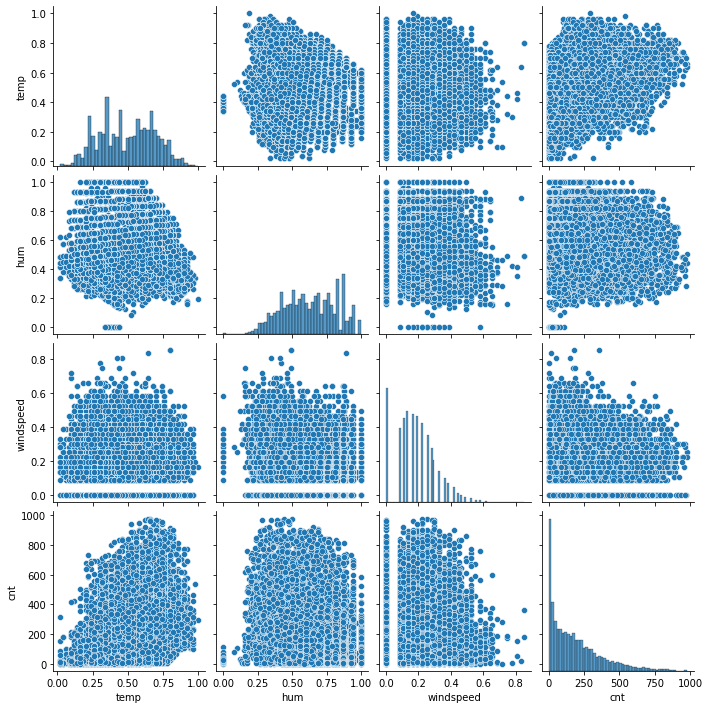

In [9]:
sns.pairplot(data = df[['temp','hum','windspeed','cnt']])
plt.show()

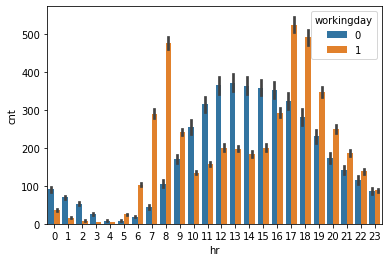

In [10]:
sns.barplot(data = df,
            x = 'hr',
            y = 'cnt',
            hue = 'workingday')
plt.show()

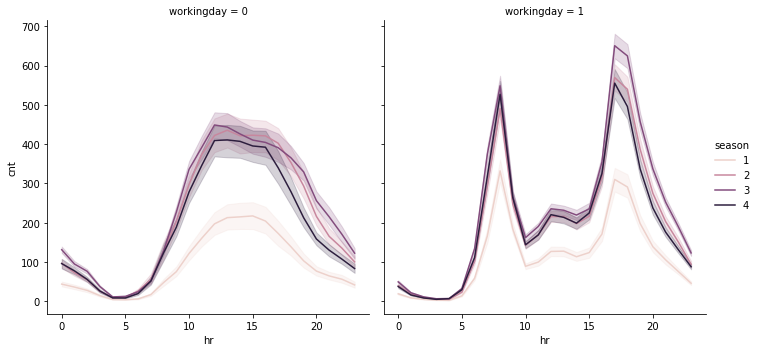

In [11]:
sns.relplot(data = df,
            x = 'hr',
            y = 'cnt',
            hue = 'season',
            col = 'workingday',
            kind = 'line')
plt.show()

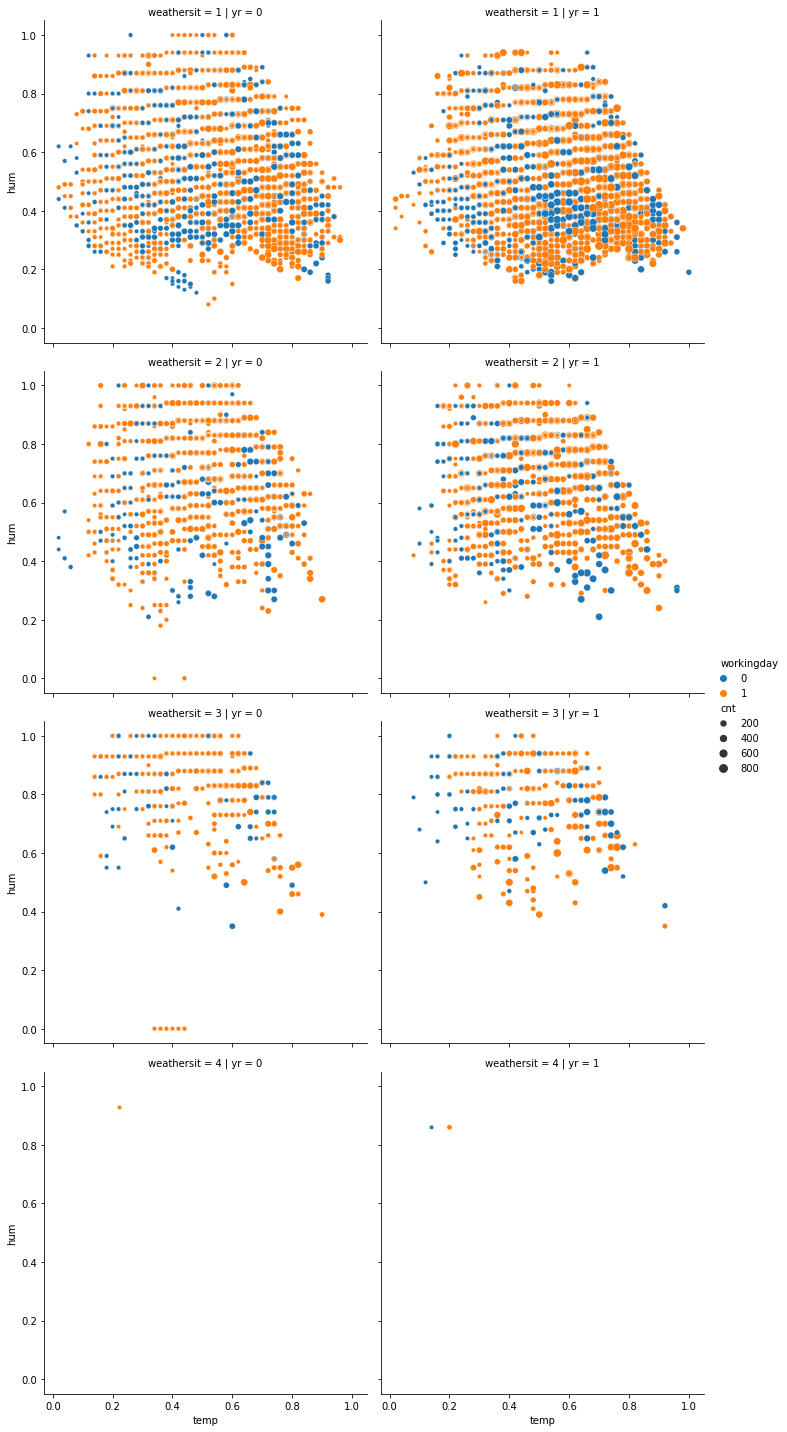

In [12]:
sns.relplot(data = df,
            x = 'temp',
            y = 'hum',
            hue = 'workingday',
            col = 'yr',
            row = 'weathersit',
            size = 'cnt')
plt.show()

<AxesSubplot:xlabel='season', ylabel='cnt'>

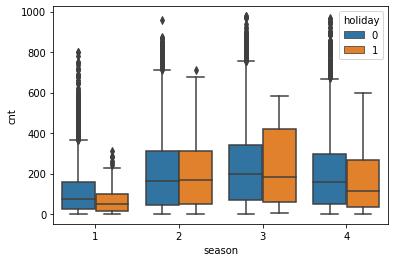

In [13]:
sns.boxplot(data = df,
           x = 'season',
           y = 'cnt',
           hue = 'holiday')

<AxesSubplot:xlabel='season', ylabel='cnt'>

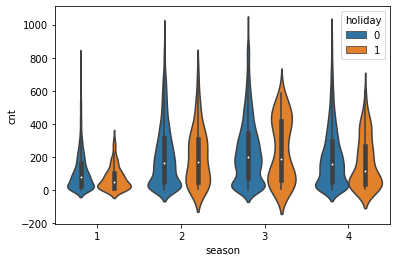

In [14]:
sns.violinplot(data = df,
           x = 'season',
           y = 'cnt',
           hue = 'holiday')

## Reservation Prediction

In [41]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [42]:
y = df['cnt']

In [43]:
columns_to_be_deleted = ['cnt', 'casual','registered',
                         'dteday','instant']
df.drop(columns_to_be_deleted, axis = 1, inplace = True)

In [53]:
transformers = [
    ['one_hot', OneHotEncoder(),['season','yr','mnth','hr','weathersit']],
    ['scaler', RobustScaler(), ['temp', 'atemp', 'hum','windspeed']]
]

In [54]:
ct = ColumnTransformer(transformers, remainder = 'passthrough')
X = ct.fit_transform(df)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y) 

model = LinearRegression()
model.fit(X_train, y_train)

p_train = model.predict(X_train)
p_test = model.predict(X_test)
mae_train = mean_absolute_error(y_train, p_train)
mae_test = mean_absolute_error(y_test, p_test)

print(f'Train: {mae_train.round(5)}\nTest: {mae_test.round(5)}')
print(f'Mean count: {np.median(y)}')


Train: 75.56999
Test: 74.72385
Mean count: 142.0
